In [49]:
# Import potential libraries to use

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
hpc_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/household_PC.csv", delimiter = ";")
hpc_df.head()

<ipython-input-50-b03eef4e419a>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  hpc_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/household_PC.csv", delimiter = ";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [51]:
hpc_df.shape

(2075259, 9)

In [55]:
hpc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [58]:
hpc_df.dropna(inplace = True)

In [56]:
hpc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [59]:
hpc_df["Date"] = pd.to_datetime(hpc_df["Date"], errors='coerce')
hpc_df["Time"] = pd.to_datetime(hpc_df["Time"], errors='coerce')
hpc_df['Global_active_power'] = pd.to_numeric(hpc_df['Global_active_power'])
hpc_df['Global_reactive_power'] = pd.to_numeric(hpc_df['Global_reactive_power'])
hpc_df['Voltage'] = pd.to_numeric(hpc_df['Voltage'])
hpc_df['Global_intensity'] = pd.to_numeric(hpc_df['Global_intensity'])
hpc_df['Sub_metering_1'] = pd.to_numeric(hpc_df['Sub_metering_1'])
hpc_df['Sub_metering_2'] = pd.to_numeric(hpc_df['Sub_metering_2'])

# Make the date index
hpc_df = hpc_df.set_index('Date')

In [ ]:
hpc_df.head()

#### Q11.  
Firstly, forward-fill all the missing values.Resample the data from a minute sampling rate to an hourly sampling rate (i.e sum over the minutes for each hour). Which of the following is a plot of the hourly global_active_power over time?

In [60]:
hpc_df_ffil = hpc_df.fillna(method= 'ffill')


hpc_df_ffil =   hpc_df.resample( 'H' ).sum()

<ipython-input-60-9af1eb8b4204>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hpc_df_ffil =   hpc_df.resample( 'H' ).sum()


<Axes: xlabel='Date'>

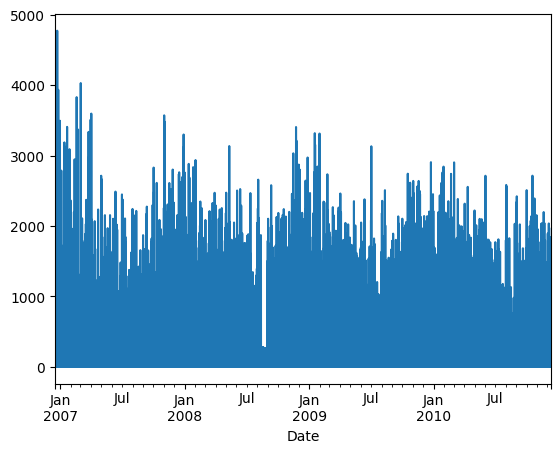

In [62]:
hpc_df_ffil['Global_active_power'].plot()

#### Q12
What is the Pearson correlation coefficient between the global_active_power and voltage? To 3 decimal places

In [65]:
hpc_df_ffil[['Global_active_power', 'Voltage']].corr().round(3)

,Global_active_power,Voltage
Global_active_power,1.000,0.932
Voltage,0.932,1.000


#### Q13
What is the Pearson correlation coefficient between the Voltage and global_intensity? To 2 decimal places.

In [66]:
hpc_df_ffil[['Global_intensity', 'Voltage']].corr().round(2)

,Global_intensity,Voltage
Global_intensity,1.00,0.93
Voltage,0.93,1.00


### Univariate Time Series Forecasting Model




Using the daily sampling rate (sum), divide the data into a train and test set. The last 300 days is your test set and the first (x-300) days is your training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’).

In [69]:
# Downsample to daily data

hpc_df_daily =   hpc_df.resample( 'D' ).sum()

<ipython-input-69-5fc2bfa7f484>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hpc_df_daily =   hpc_df.resample( 'D' ).sum()


In [70]:
hpc_df_daily.shape

(1457, 7)

In [71]:
# Let the global_active_power be y

global_active_power = hpc_df_daily['Global_active_power'].to_frame(name = 'global_active_power').reset_index()

global_active_power.head()

,Date,global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [72]:
global_active_power = global_active_power.rename(columns ={"Date" : "ds", "global_active_power": "y"})

In [73]:
# Split the dataset into train test set
x = len(global_active_power)
y_train = global_active_power.iloc[:x-300]
y_test = global_active_power.iloc[x-300:]
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1157, 2)
y_test shape: (300, 2)


In [74]:
df = y_train

df.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [75]:
y_test

,ds,y
1157,2010-02-15,2097.132
1158,2010-02-16,1797.756
1159,2010-02-17,2054.560
1160,2010-02-18,1761.156
1161,2010-02-19,1953.572
...,...,...
1452,2010-12-07,1109.574
1453,2010-12-08,529.698
1454,2010-12-09,1612.092
1455,2010-12-10,1579.692


In [76]:
from prophet import Prophet
model = Prophet()
model.fit(y_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ev0nvzx/4z0vu21l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ev0nvzx/ayq9vrf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14213', 'data', 'file=/tmp/tmp9ev0nvzx/4z0vu21l.json', 'init=/tmp/tmp9ev0nvzx/ayq9vrf1.json', 'output', 'file=/tmp/tmp9ev0nvzx/prophet_model7jyk_ugi/prophet_model-20231205224252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:42:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:42:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [77]:
#predict
forecast = model.predict(y_test)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper' , 'trend' , 'trend_lower', 'trend_upper' ]]


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-02-15,1320.898251,577.503089,2056.611769,1466.552607,1466.552607,1466.552607
1,2010-02-16,1396.820366,687.256884,2077.919088,1466.394311,1466.394311,1466.394311
2,2010-02-17,1324.006097,598.178310,2028.441512,1466.236016,1466.236016,1466.236016
3,2010-02-18,1227.590471,519.515499,1996.094851,1466.077721,1466.077721,1466.077721
4,2010-02-19,1267.493838,586.505296,2038.142585,1465.919425,1465.919425,1465.919425
...,...,...,...,...,...,...,...
295,2010-12-07,1728.656645,1022.428311,2462.593076,1419.855497,1419.750272,1419.954259
296,2010-12-08,1691.767279,1010.809373,2429.881743,1419.697202,1419.591535,1419.796362
297,2010-12-09,1630.039634,837.192067,2342.673364,1419.538907,1419.432798,1419.638465
298,2010-12-10,1702.907217,907.563390,2415.109751,1419.380611,1419.274061,1419.480596


In [81]:
y_test.head()

,ds,y
1157,2010-02-15,2097.132
1158,2010-02-16,1797.756
1159,2010-02-17,2054.560
1160,2010-02-18,1761.156
1161,2010-02-19,1953.572


#### Q14

Evaluating the results of your time series modeling on the test set. What is the MAPE (in %) in 2 decimal places?

In [90]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

print(mean_absolute_percentage_error(y_test['y'], forecast['yhat']))

3.8584651343821856e+17


#### Q15

What is the RMSE in 2 decimal places?

In [91]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test['y'], forecast['yhat'])

rmse = np.sqrt(mse)

print(rmse)

597.057005529471


#### Q16

If you plot the components from the forecasted model, what day of the weekly seasonality has the lowest value?

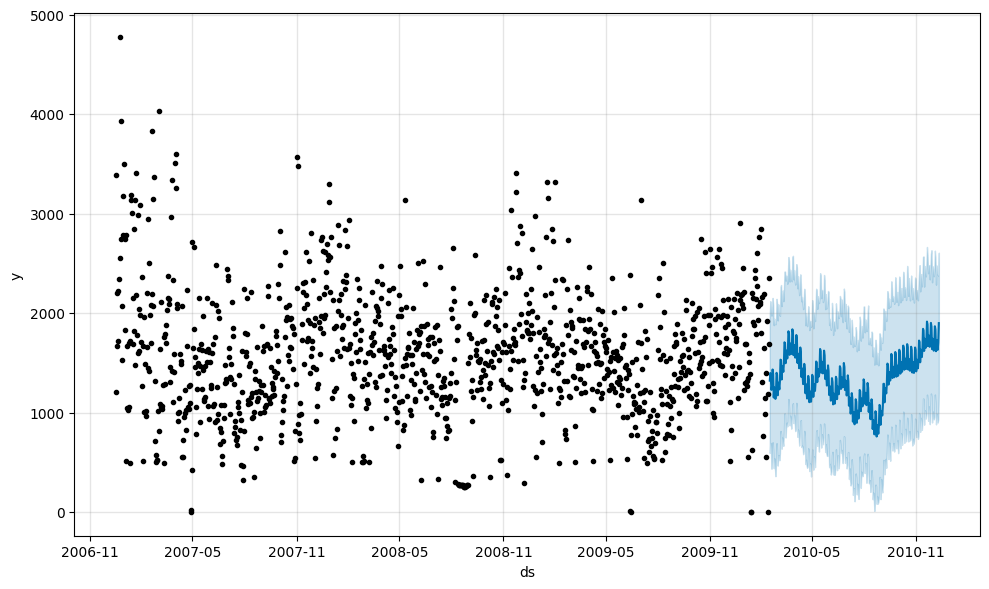

In [18]:
model.plot(forecast)
plt.show()

### Multivariate Time Series Forecasting Model

In [19]:
hpc_df_daily_multi = hpc_df_daily.reset_index()

hpc_df_daily_multi.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [34]:
hpc_df_daily_multi.columns = [['Date', 'Global_active_power', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']]

hpc_df_daily_multi.head()

,Date,Global_active_power,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [35]:
# Split the dataset into train test set

x = len(hpc_df_daily_multi)
train = hpc_df_daily_multi[:x-300]
test = hpc_df_daily_multi[x-300:]
print("train shape:", train.shape)
print("test shape:", test.shape)


train shape: (1157, 8)
test shape: (300, 8)


In [46]:
train.rename(columns = {'Global_active_power': 'y', 'Date': 'ds'}, inplace = True)
train.head()

<ipython-input-46-025a5c106518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns = {'Global_active_power': 'y', 'Date': 'ds'}, inplace = True)


,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [40]:
test.rename(columns = {'Global_active_power': 'y', 'Date': 'ds'}, inplace = True)
test.head()

<ipython-input-40-51ecb418d1a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns = {'Global_active_power': 'y', 'Date': 'ds'}, inplace = True)


,ds,y,add1,add2,add3,add4,add5,add6
1157,2010-02-15,2097.132,131.270,350563.36,8701.0,3468.0,332.0,16065.0
1158,2010-02-16,1797.756,119.606,351005.42,7413.6,1945.0,317.0,12820.0
1159,2010-02-17,2054.560,119.560,348979.42,8555.4,2294.0,6636.0,10101.0
1160,2010-02-18,1761.156,140.000,350767.00,7255.0,965.0,385.0,14884.0
1161,2010-02-19,1953.572,135.150,348058.66,8142.0,2124.0,397.0,14543.0


In [47]:
from prophet import Prophet
model = Prophet(interval_width=0.95, daily_seasonality= True)
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')


model.fit(train)

AttributeError: ignored